# Pima Indians Diabetes Database Descriptive Statistics Project

In [2]:
# import all requierd library
import pandas as pd
import numpy as np
import datetime as dt
# Data Visualization
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
# Importing dataset
diabetes = pd.read_csv("C:/Users/DELL/Downloads/diabetes.csv")

# DATA AUDIT

In [105]:
# First Five rows of Dataset
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [106]:
# Last five rows of the dataset
diabetes.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [107]:
# Shape of the dataset
diabetes.shape

(768, 9)

In [108]:
# Columns present in the dataset
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [109]:
# A concise summary of the dataset
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [110]:
# Checking missing values
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [111]:
# Generating descriptive statistics summary
diabetes.describe().round()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.0,768.0,768.0,768.0,768.0,768.0,768.0,768.0,768.0
mean,4.0,121.0,69.0,21.0,80.0,32.0,0.0,33.0,0.0
std,3.0,32.0,19.0,16.0,115.0,8.0,0.0,12.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0
25%,1.0,99.0,62.0,0.0,0.0,27.0,0.0,24.0,0.0
50%,3.0,117.0,72.0,23.0,30.0,32.0,0.0,29.0,0.0
75%,6.0,140.0,80.0,32.0,127.0,37.0,1.0,41.0,1.0
max,17.0,199.0,122.0,99.0,846.0,67.0,2.0,81.0,1.0


In [112]:
# Data types
diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

# EXPLORATORY DATA ANALYSIS

##  Appropriate Measure of central Tendency for Glucose and outcome column

In [113]:
avgGlucose = diabetes.groupby('Outcome')['Glucose'].mean()
avgGlucose

Outcome
0    109.980000
1    141.257463
Name: Glucose, dtype: float64

In [114]:
x = list(avgGlucose.index)
y =list(avgGlucose.values)

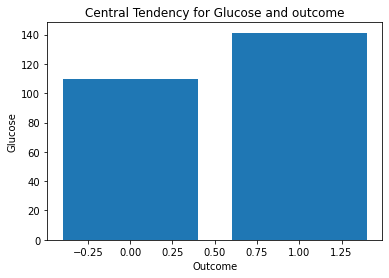

In [115]:
plt.title("Central Tendency for Glucose and outcome")
plt.bar(x, y)
plt.xlabel("Outcome")
plt.ylabel("Glucose")
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x2e69b2bc3d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2e69b2bc8b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2e69b2bc040>],
 'medians': [<matplotlib.lines.Line2D at 0x2e69b2bcfd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2e69b2c83a0>],
 'means': []}

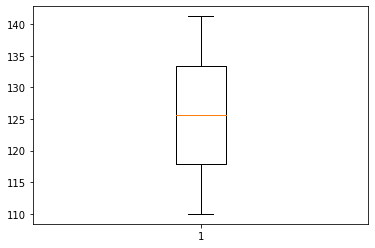

In [116]:
plt.boxplot(avgGlucose)

## Data summaries for required columns

In [117]:

diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [118]:
# Outcome is the column which we are going to predict,which says if the patient is diabetic or not.
# If 1 means the person is diabetic and 0 means a person is not. 
diabetes.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

In [119]:
# 1)Numerical features: 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
# 2)Outcome is the target variable.(0/1)
# 3)There is No null Values in the dataset.
# 4)No features seems is necessary.

## examine the relationship between Age and Glucose

In [84]:
x = diabetes['Age']
y = diabetes['Glucose']

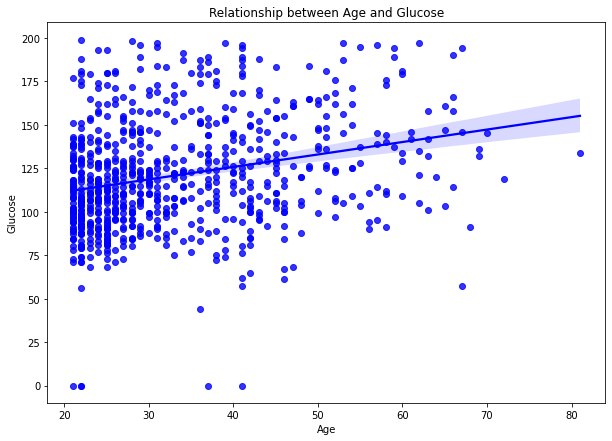

In [120]:
plt.figure(figsize = (10,7))
plt.title("Relationship between Age and Glucose")
sns.regplot(x = "Age", y = "Glucose", data = diabetes, color = 'blue')
plt.show()

## Distribution of Outcome variable

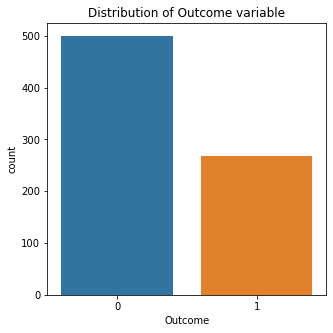

In [121]:
plt.figure(figsize = (5,5))
plt.title("Distribution of Outcome variable")
sns.countplot(x = "Outcome", data = diabetes)
plt.show()

In [122]:
# 1 means persons are diabetic
# 0 means persons are not diabetic

## Distribution of numerical 

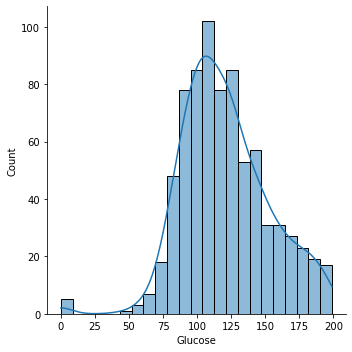

In [123]:
sns.displot(data=diabetes, x="Glucose", kde=True)

In [124]:
# The Variable Glucose is normal skewed.

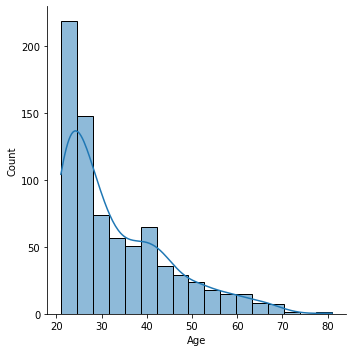

In [125]:
sns.displot(data=diabetes, x="Age", kde=True)

In [126]:
# The Variable Age is Positively skewed.

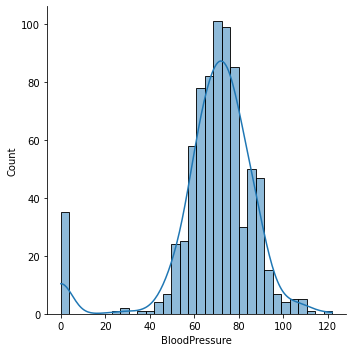

In [127]:
sns.displot(data=diabetes, x="BloodPressure", kde=True)

In [128]:
# The Variable BloodPressure is Negatively skewed.

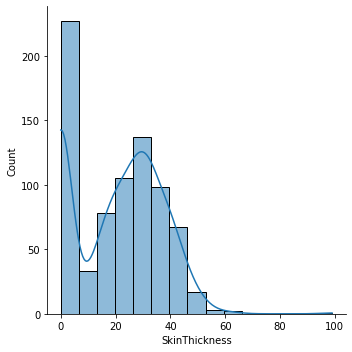

In [129]:
sns.displot(data=diabetes, x="SkinThickness", kde=True)

In [130]:
# The Variable Skin Thickness is Positively skewed.

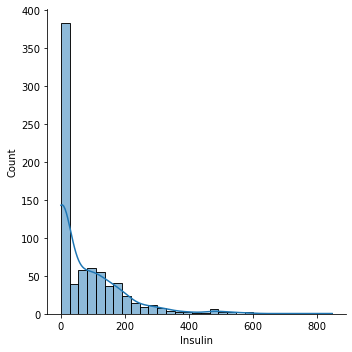

In [131]:
sns.displot(data=diabetes, x="Insulin", kde=True)

In [132]:
# The  Variable Insulin is Positively skewed,

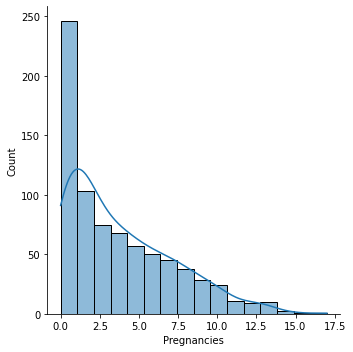

In [133]:
sns.displot(data=diabetes, x="Pregnancies", kde=True)

In [134]:
# The variable pregnancies is positively skewed.

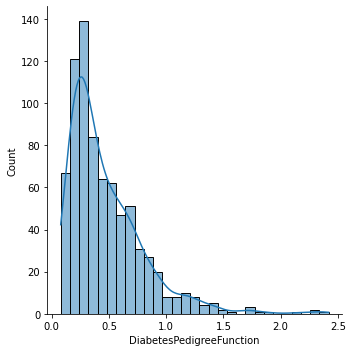

In [135]:
sns.displot(data=diabetes, x="DiabetesPedigreeFunction", kde=True)

In [136]:
# The Variable DiabetesPedigreeFunction positivly skewed.

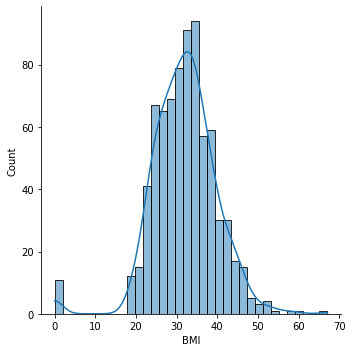

In [103]:
sns.displot(data=diabetes, x="BMI", kde=True)

In [67]:
# The variable BMI is normally skewed

## Examine the outliers of these variables. 

<AxesSubplot:>

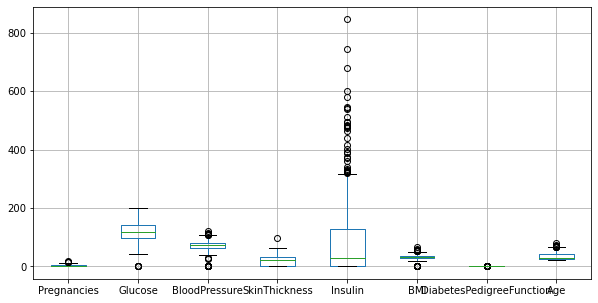

In [104]:
plt.figure(figsize = (10,5))
diabetes.boxplot(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

## Measures of central tendency and dispersion 

In [51]:
diabetes.mean()

Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

In [43]:
diabetes.median()

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

In [44]:
diabetes.mode()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.0,99,70.0,0.0,0.0,32.0,0.254,22.0,0.0
1,NaN,100,NaN,NaN,NaN,NaN,0.258,NaN,NaN


In [52]:
# Measures of Dispersion
# calculate interquartitle range
q3, q1 = np.percentile(diabetes,[75, 25])
iqr = q3 - q1
iqr

60.53775

In [53]:
# variance
diabetes.var()

Pregnancies                    11.354056
Glucose                      1022.248314
BloodPressure                 374.647271
SkinThickness                 254.473245
Insulin                     13281.180078
BMI                            62.159984
DiabetesPedigreeFunction        0.109779
Age                           138.303046
Outcome                         0.227483
dtype: float64

In [54]:
# Standard Deviation
diabetes.std()

Pregnancies                   3.369578
Glucose                      31.972618
BloodPressure                19.355807
SkinThickness                15.952218
Insulin                     115.244002
BMI                           7.884160
DiabetesPedigreeFunction      0.331329
Age                          11.760232
Outcome                       0.476951
dtype: float64